In [2]:
presidents = ["Washington", "Adams", "Jefferson", "Madison", "Monroe", "Adams", "Jackson"]
for num, name in enumerate(presidents, start=0):
    print("President {}: {}".format(num, name))


President 0: Washington
President 1: Adams
President 2: Jefferson
President 3: Madison
President 4: Monroe
President 5: Adams
President 6: Jackson


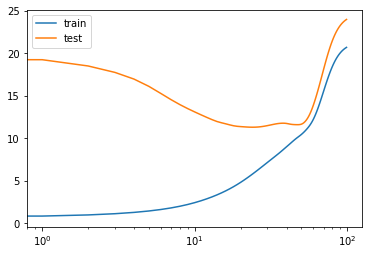

In [3]:
# -*- coding: utf-8 -*-

from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_boston
from scipy.special import logsumexp
%matplotlib inline
# from sklearn.model_selection import train_test_split

np.random.seed(0)

# load boston housing prices dataset
boston = load_boston()
x = boston['data']
N = x.shape[0]
x = np.concatenate((np.ones((506,1)),x),axis=1) #add constant one feature - no bias needed
d = x.shape[1]
y = boston['target']

idx = np.random.permutation(range(N))

#helper function
def l2(A,B):
    '''
    Input: A is a Nxd matrix
           B is a Mxd matirx
    Output: dist is a NxM matrix where dist[i,j] is the square norm between A[i,:] and B[j,:]
    i.e. dist[i,j] = ||A[i,:]-B[j,:]||^2
    '''
    A_norm = (A**2).sum(axis=1).reshape(A.shape[0],1)
    B_norm = (B**2).sum(axis=1).reshape(1,B.shape[0])
    dist = A_norm+B_norm-2*A.dot(B.transpose())
    return dist

 #to implement
def LRLS(test_datum,x_train,y_train, tau,lam=1e-5):
    '''
    iterative reweighted least squares
    Input: test_datum is a dx1 test vector
           x_train is the N_train x d design matrix
           y_train is the N_train x 1 targets vector
           tau is the local reweighting parameter
           lam is the regularization parameter
    output is y_hat the prediction on test_datum
    '''
    # calculate A using I2(A,B)
    #reshape datum
    
    datum = test_datum.reshape(1,test_datum.shape[0])
   
    #x-xi
    norms = l2(datum, x_train)
    #numerator
    numerator = -norms / (2 * (tau ** 2))
    #denominator logsumexp
    #exp(x-xi)/sumexp(x-xj)=exp((x-xi)-logsumexp(x-xj))
    denominator=logsumexp(-norms / (2 * (tau ** 2)))
    Ai= np.exp(numerator - denominator)
    
    A=np.diagflat(Ai)
    n=x_train.shape[1]
    # implement the equation obtained from the question 2a). terative reweighted least squares
    #W is the unknown eqaution
    #print(x_train.shape,A.shape,y_train.shape)
    right= x_train.T.dot(A).dot(y_train)
    left=np.dot(x_train.T,np.dot(A,x_train))+lam*np.identity(n)
    
    #solve the equation
    w = np.linalg.solve(left, right)

    y_hat = datum.dot(w)
    
    return y_hat


def run_validation(x,y,taus,val_frac):
    '''
    Input: x is the N x d design matrix
           y is the N x 1 targets vector    
           taus is a vector of tau values to evaluate
           val_frac is the fraction of examples to use as validation data
    output is
           a vector of training losses, one for each tau value
           a vector of validation losses, one for each tau value
    '''
#     #method 1
#     Randomly split the X's into training (70%), validation examples (30%)
#     featuredata=boston.data
#     targetdata=boston.target
#     featurenames=boston.feature_names
#     #print(targetdata.shape)
#     #d = {'data': targetdata, 'feature': featuredata}
#     dfall= pd.DataFrame(featuredata,columns=featurenames)
#     dfall['target']=targetdata
#     dfx=pd.DataFrame(x)
#     dfy=targetdata
#     split train data and test data
#     train_x, test_x,train_y,test_y= train_test_split(x,y,test_size=0.3, random_state=100)
    
    # random split the x into train_x and test_x. random split the y into train_y and test_y. 
    #https://www.programcreek.com/python/example/63665/numpy.random.permutation exmaple 15
    new_x=x[idx]
    new_y=y[idx]
    n=int(new_x.shape[0]*(1-val_frac))
    train_x,test_x=new_x[:n,],new_x[n:,]
    train_y,test_y=new_y[:n,],new_y[n:,]
    #initialize empty array
    train_loss=[]
    validation_loss=[]
    train_error=[]
    validation_error=[]
    
    #//https://treyhunner.com/2016/04/how-to-loop-with-indexes-in-python/
    
    for i, tau in enumerate(taus):
        for j, xi in enumerate(train_x):
            #get the predicted y
            y_hat = LRLS(xi, train_x, train_y, tau)
            
            train_error.append((y_hat - train_y[j])**2)
            
        for j, xi in enumerate(test_x):
            #get the predicted y
            y_hat = LRLS(xi, train_x, train_y, tau)
            validation_error.append((y_hat - test_y[j])**2)
        #generate the loss function （mean square loss）
        train_msl=np.mean(train_error)
        validation_msl=np.mean(validation_error)   
        train_loss.append(train_msl)
        validation_loss.append(validation_msl)

        #empty array
        train_msl=[]
        validation_msl=[]
        train_error=[]
        validation_error=[]
    
  
        
    return train_loss, validation_loss


if __name__ == "__main__":
    # In this excersice we fixed lambda (hard coded to 1e-5) and only set tau value. Feel free to play with lambda as well if you wish
    taus = np.logspace(1,3,100) # generate 30 numbers within [10,1000] 
    train_losses, test_losses = run_validation(x,y,taus,val_frac=0.3)
    plt.semilogx(train_losses,label="train")
    plt.semilogx(test_losses,label="test")
    plt.legend()
    plt.show()


  



In [2]:
x[1]

array([1.0000e+00, 2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00,
       4.6900e-01, 6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00,
       2.4200e+02, 1.7800e+01, 3.9690e+02, 9.1400e+00])

In [25]:
n=int(x.shape[0]*(1-0.3))

In [26]:
n

354

In [28]:
train_x,test_x=x[:n,],x[n:,]

In [30]:
train_x.shape

(354, 14)